In [ ]:
import os
import os.path as osp
from paddlers.datasets import VOCDetDataset 
from paddlers import transforms as T

# 定义数据增强
train_transforms = T.Compose([
    T.DecodeImg(),
    T.RandomDistort(),
    T.RandomCrop(),
    T.RandomExpand(prob=0.2),
    T.RandomHorizontalFlip(),
    T.BatchRandomResize(
        target_sizes=[512, 544, 576, 608, 640, 672, 704],
        interp='RANDOM'),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.ArrangeDetector('train')
])
eval_transforms = T.Compose([
    T.DecodeImg(),
    T.Resize(target_size=608, interp='CUBIC'),
    T.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.ArrangeDetector('eval')
])

# 定义数据集
data_dir = '/home/zju/data_szw/paddlers/data/rsod/aircraft/'
train_file_list = osp.join(data_dir, 'train.txt')
val_file_list = osp.join(data_dir, 'eval.txt')
label_file_list = osp.join(data_dir, 'labels.txt')
train_dataset = VOCDetDataset(
    data_dir=data_dir,
    file_list=train_file_list,
    label_list=label_file_list,
    transforms=train_transforms,
    shuffle=True)
eval_dataset = VOCDetDataset(
    data_dir=data_dir,
    file_list=val_file_list,
    label_list=label_file_list,
    transforms=eval_transforms,
    shuffle=False)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

# 反归一化
def in_normal(img):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = (255 * (img * std + mean)).astype("uint8")
    return img

# 绘制矩形框
def visual(img, bboxs):
    for bbox in bboxs:
        x1, y1, x2, y2 = bbox
        cv2.rectangle(img, (x1, y1), (x2, y2),(255,0,0),2)
    return img


for data in train_dataset:
    # print(data[0]["gt_bbox"])
    img = in_normal(data["image"])
    img = np.ascontiguousarray(img)
    vis = visual(img, data["gt_bbox"].astype(int))
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.show()
    break

In [50]:
import paddlers as pdrs
model = pdrs.tasks.load_model('/home/zju/data_szw/paddlers/output/det/yolov3_rsod_aircraft/best_model/')

result = model.evaluate(eval_dataset)
print(result)

2023-10-10 08:14:10 [INFO]	Model[YOLOv3] loaded.
2023-10-10 08:14:10 [INFO]	Start to evaluate(total_samples=45, total_steps=45)...
2023-10-10 08:14:11 [INFO]	Accumulating evaluatation results...
OrderedDict([('bbox_map', 83.12773682997)])


[{'category_id': 0, 'category': 'aircraft', 'bbox': [2672.935302734375, 1164.9620361328125, 343.6923828125, 311.857177734375], 'score': 0.97819584608078}, {'category_id': 0, 'category': 'aircraft', 'bbox': [493.433837890625, 676.7659301757812, 359.8082275390625, 329.997802734375], 'score': 0.9544674754142761}, {'category_id': 0, 'category': 'aircraft', 'bbox': [1764.521484375, 2741.423583984375, 330.874755859375, 304.45654296875], 'score': 0.9488651752471924}, {'category_id': 0, 'category': 'aircraft', 'bbox': [1268.93408203125, 2102.9248046875, 351.1083984375, 307.66015625], 'score': 0.8150160908699036}, {'category_id': 0, 'category': 'aircraft', 'bbox': [844.13134765625, 1024.837158203125, 392.466552734375, 300.3916015625], 'score': 0.35501766204833984}, {'category_id': 0, 'category': 'aircraft', 'bbox': [1814.524658203125, 1533.8785400390625, 64.272705078125, 69.440185546875], 'score': 0.25559839606285095}, {'category_id': 0, 'category': 'aircraft', 'bbox': [774.5161743164062, 1089.

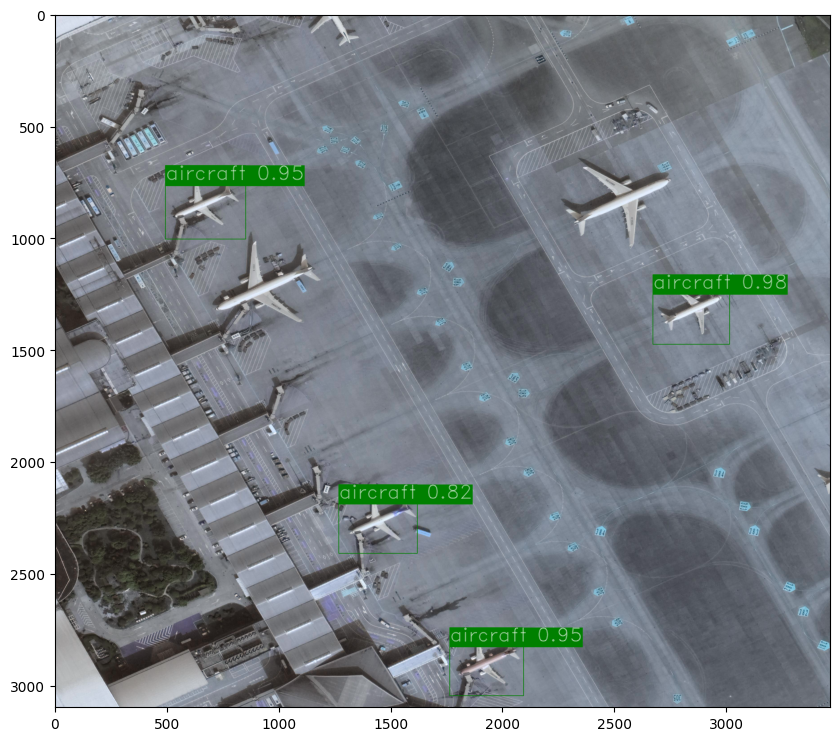

In [55]:
from paddlers.tasks.utils.visualize import visualize_detection
import matplotlib.pyplot as plt

%matplotlib inline

test_transforms = T.Compose([
    T.DecodeImg(),
    T.SelectBand([1,2,3]),
    T.Resize(target_size=608, interp='CUBIC'),
    T.Normalize(
        mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    T.ArrangeDetector('test')
])

img_path = '/home/zju/data_szw/test/data/aircraft/xiaoshanjichang.tif'
pred = model.predict(img_path,test_transforms)
vis_img = visualize_detection(img_path,pred,save_dir=None)
print(pred)
plt.figure(figsize=(10, 10))
plt.imshow(vis_img)
plt.show()